###### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

## Importing Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma
from sklearn.model_selection import train_test_split


from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error 

In [2]:
train=pd.read_csv('train_dataset.csv')
train.shape

(8523, 12)

In [3]:
test = pd.read_csv('test_dataset.csv')
test.shape

(5681, 11)

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### Framework of model building

**Explortory Data Analysis :**
  * Univariate Analysis
  * Bivariate Analysis
  * Missing value imputation
  * Outlier analysis and treatment
  * Feature Engineering
  * Statistical hypothesis testing
  * Categorical variable analysis and encoding
  * scaling and transformation
  
Note : Post EDA you have reached the pre-modelling stage

**models :**
   * Base Models - Average in case of linear regression (worst model)
   * in case of classification - Highest frequency (worst model -- mode)
   * Linear regression 
   * Tree based models - decision tree , RandomForest ,GradientBoosting machines etc
   * Remember that all the models shall be cross validated models 
   

In [6]:
## combine the train  and test just for EDA part 
combined = pd.concat([train,test],ignore_index = True)

combined.shape,train.shape,test.shape

((14204, 12), (8523, 12), (5681, 11))

## Univariate Analysis
* it represents single variable analysis
* Num vars : Distplot/histogram
* Cat vars : Countplot


In [7]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [9]:
# lets pull the list of numerical variables 

nums = combined.select_dtypes(include = np.number).columns 

In [10]:
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
cats = combined.select_dtypes(exclude = np.number).columns 

In [12]:
cats

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### Univariate Analysis - Numeric columns -- distplot

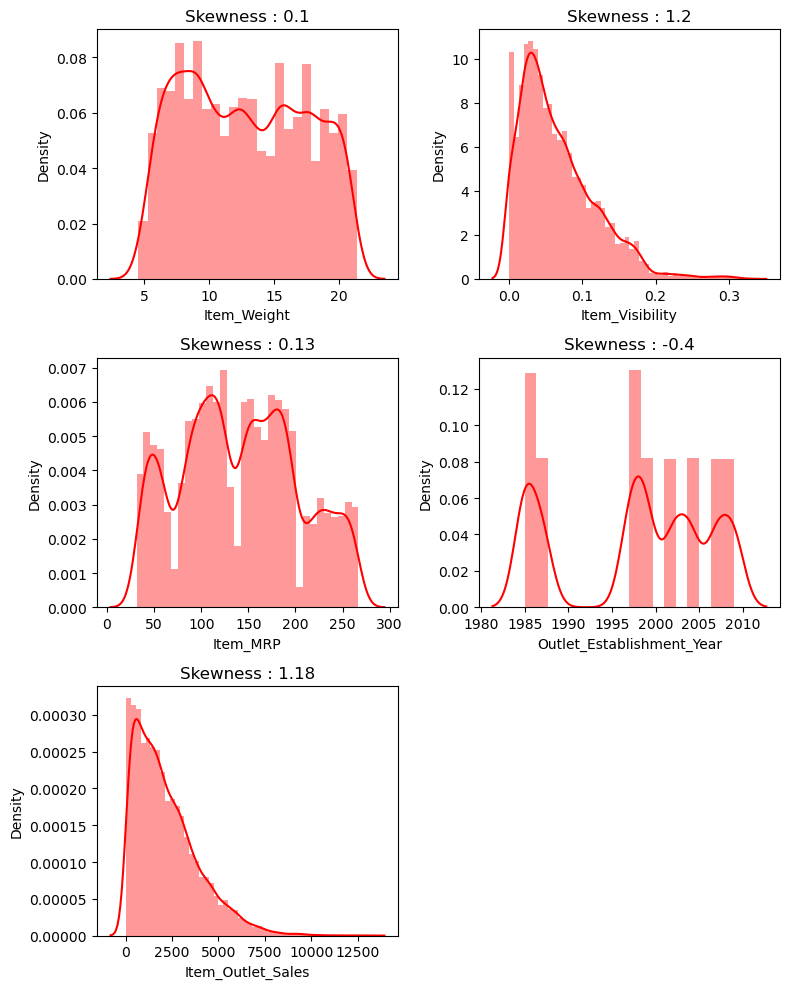

In [14]:
# Univariate analysis -- distplot
t=1 
plt.figure(figsize=(8,10))
for i in nums :
    plt.subplot(3,2,t)
    sns.distplot(combined[i],color='red')
    plt.title(f'Skewness : {round(combined[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

<Figure size 1200x900 with 0 Axes>

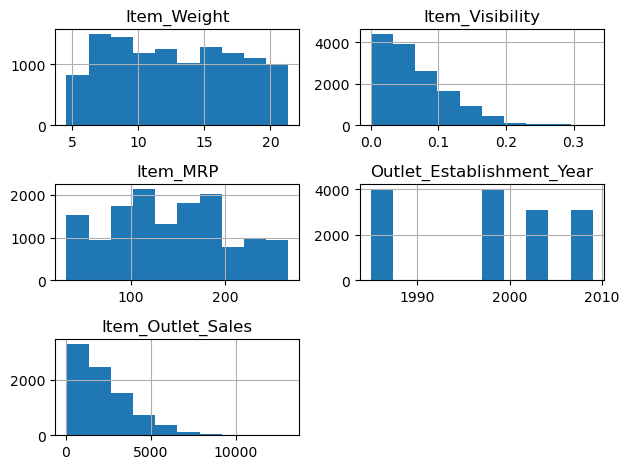

In [15]:
##Simple approach -- histogram
##num cols :
plt.figure(figsize=(12,9))
combined.loc[:,nums].hist()
plt.tight_layout()
plt.show()
# will fail when number of columns are high due to layout issue then we must use distplot from sns by loop


### Inference:
* Item_Weight is uniform in shape, as it  hence, we can say it will not have any relationship with y-variable
* Item_MRP is multimodel data, it it has many peaks.
* Outlet_Establishment_Year is a categorical variable hence giving those bars in the distribution
* Sales and Item_Visibility are positively skewed.

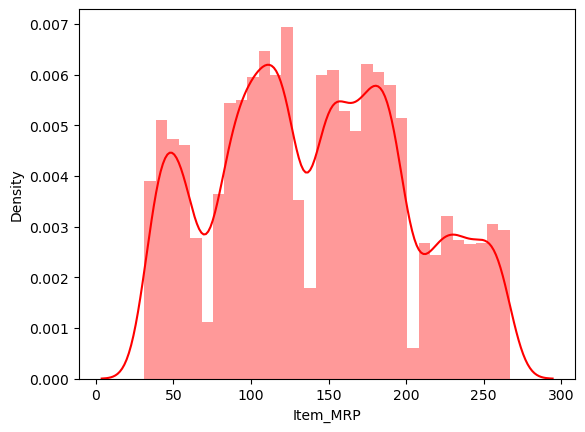

In [22]:
sns.distplot(combined.Item_MRP,color='red')
plt.show()

## multi-model data 

### 5-point summary :

In [27]:
combined.loc[:,nums].describe().T
#standard deviation of a numerical column should never be exactly 0
#if std of a numerical column is 0 it means that column is insignificant,has no information or it will create no variance
#in the target column
#and hence has no spread so we need to eliminate that column from the data 


,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


### Univariate Analysis - Categorical columns -- countplot

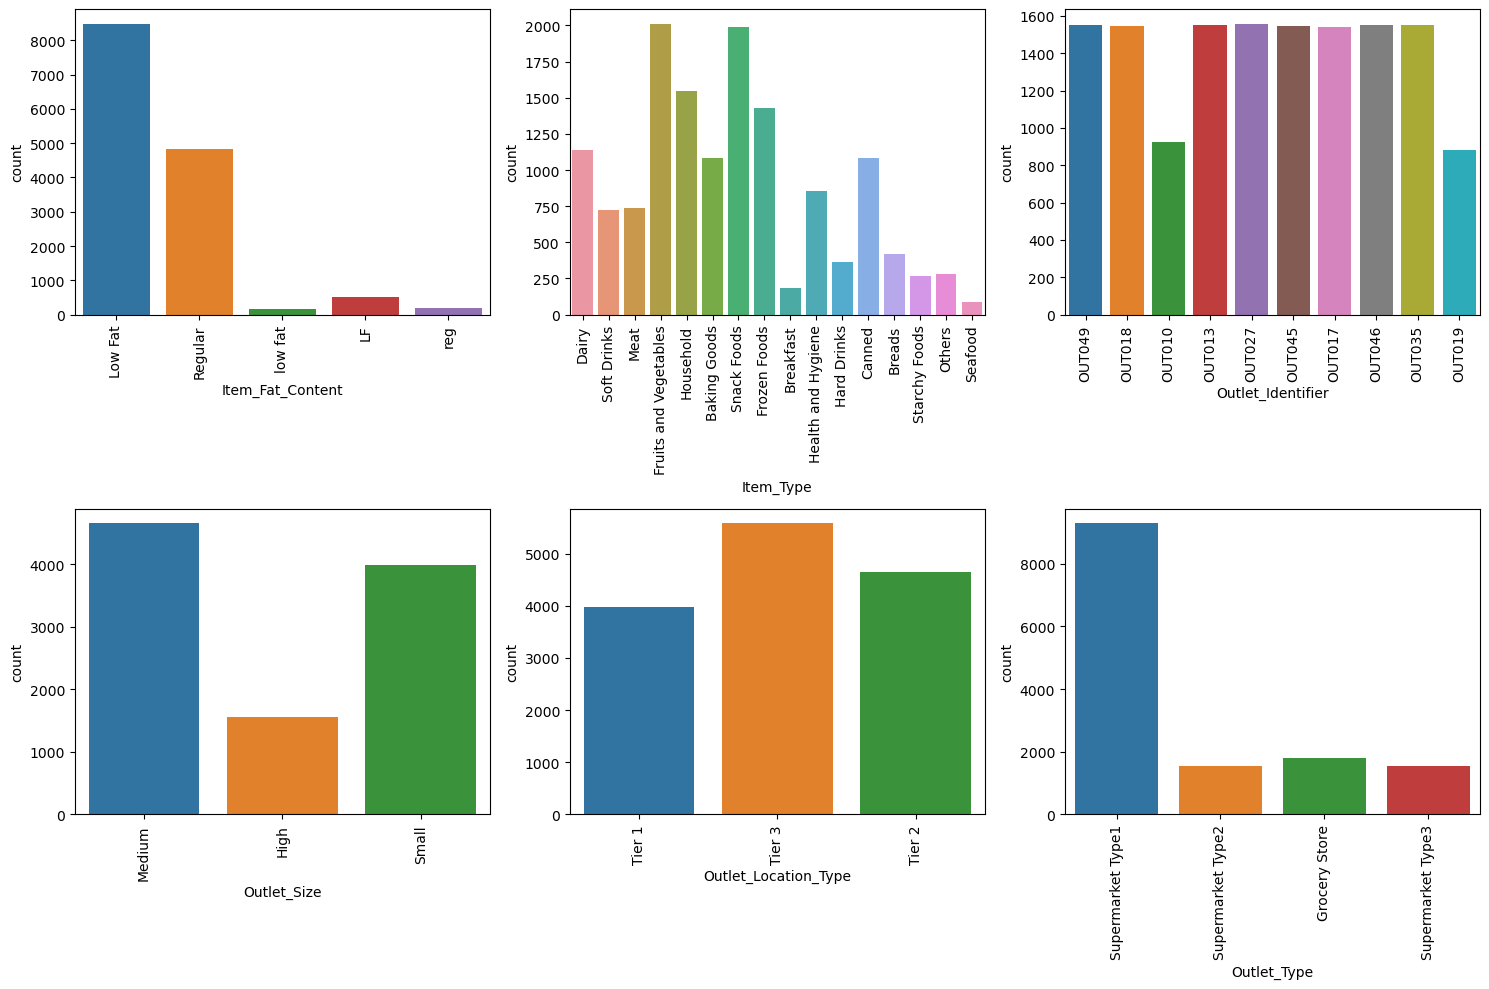

In [28]:
# Cats
#Item_ID has 1600+ unique values which mean 1600+ bars hence we will remove it
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

nrows = 2
ncols = 3
iterator = 1
plt.figure(figsize = (15,10))
for i in cat_cols :
    plt.subplot(2,3,iterator)
    sns.countplot(data=combined , x=i )
    iterator += 1
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Inference:
* The Item type like snack food, vegetables, fruits are top selling items.
* Frequency of outlets is highest in tier 3 cities.
* Low Fat products are sold the most.
* Outlets of Medium size are more than the large and small sized outlet.
* Error : In Item Fat Content, Low fat is written as Low Fat,low fat, and lf
* Error : In Item Fat Content, Regular is written as Regular and reg

In [29]:
combined.Outlet_Identifier.value_counts()
#number of Outlet27 is the highest 

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

### Power of univariate analysis in a business :
to start a new branch lets open a type27 outlet (highest frequency) and lets make it medium sized and we should sell those products which are high in number like fruits and veggies , snacks and we will do survey what people need more and we will bring inventory of that particular product 


## Bivariate Analysis - Number vs Category -- boxplot

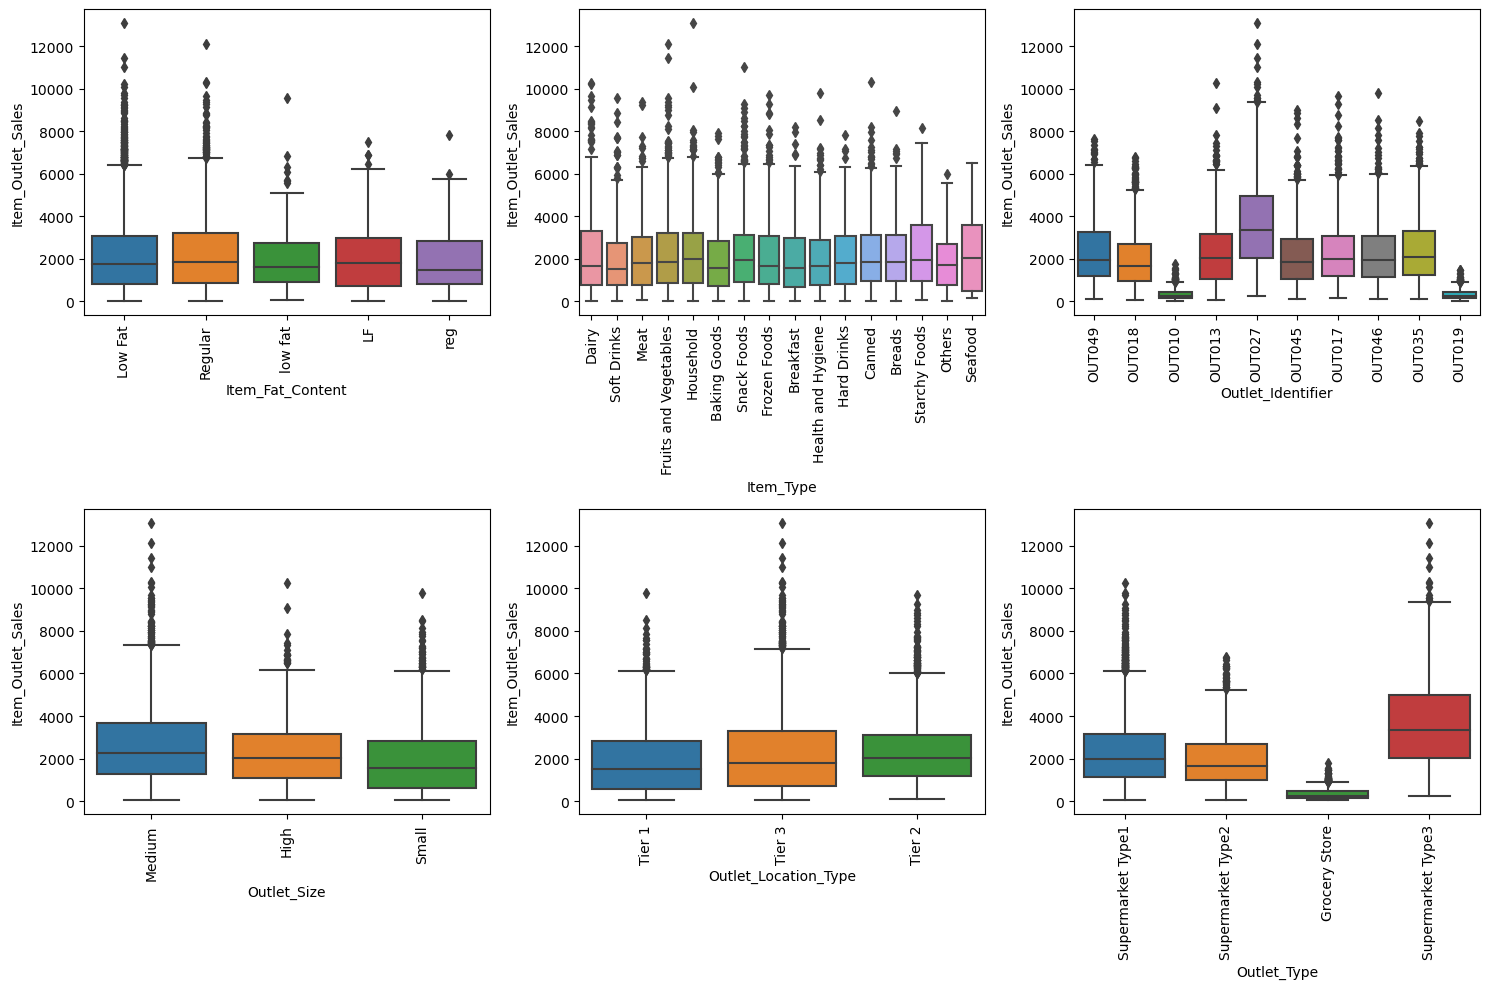

In [30]:
#category vs number  -- boxplot
nrows = 2
ncols = 3
iterator = 1
plt.figure(figsize = (15,10))
for i in cat_cols :
    plt.subplot(2,3,iterator)
    sns.boxplot(data=combined , x=i, y = combined['Item_Outlet_Sales'] )
    iterator += 1
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [31]:
# most likely out27 is a medium sized outlet as both the counts of out27 and medium sized outlets are highest

In [32]:
combined['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [33]:
#lets correct the names in item fat content:

combined['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF' : 'Low Fat', 'reg':'Regular'},inplace=True)

In [34]:
#or
#combined.Item_Fat_Content.replace(to_replace = ['low fat', 'LF', 'reg'],value = ['Low Fat','Low Fat', 'Regular'], inplace = True)

In [35]:
combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

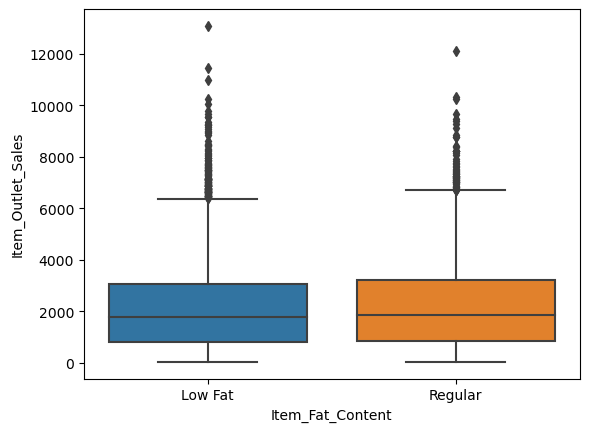

In [37]:
sns.boxplot(x='Item_Fat_Content',y = 'Item_Outlet_Sales',data=combined)
plt.show()

### Inference :Overall, this box plot tells us that there is no substantial difference in the distribution of sales between Low Fat and Regular items, though both have a wide range of outlier values indicating some items are much more successful than others.








## Null Values 

In [38]:
combined.isnull().sum()[combined.isnull().sum()!=0]
#item outlet sales has null values as our test data has no column of sales(as we neeed to predict that)

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

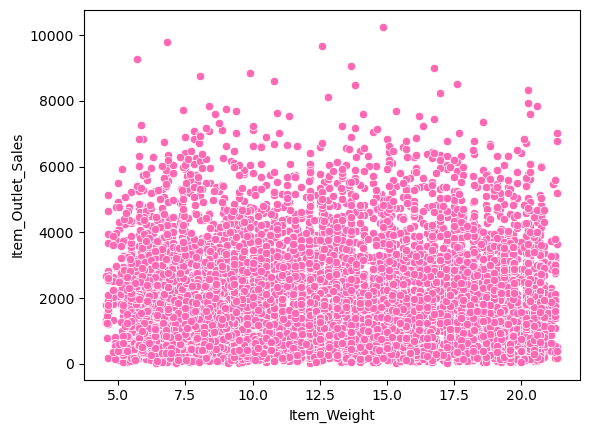

In [39]:
#  Item wieght vs sales
sns.scatterplot(x='Item_Weight',y ='Item_Outlet_Sales',data=combined,color='hotpink')
plt.show()

### inference : Weight has no relation with the sales

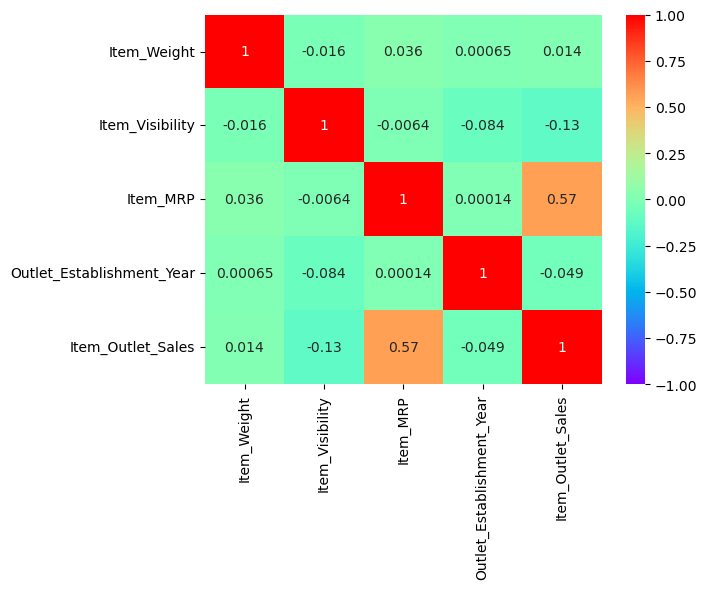

In [40]:
sns.heatmap(combined.corr(numeric_only=True),vmin=-1,vmax=1,annot=True,cmap='rainbow')
plt.show()

* This correlation heatmap visualizes the relationships between different numerical variables in your dataset, specifically focusing on how these variables correlate with each other. Each cell in the heatmap shows the correlation coefficient between two variables, which can range from -1 to 1.

* Color Coding:

1. Red/Orange: High positive correlation.
2. Blue/Purple: High negative correlation.
3. Green: Low or no correlation.
4. Key Observations:

#### Item_Outlet_Sales:

* Has a moderate positive correlation with Item_MRP (0.57). This suggests that as the price of the item increases, the sales tend to increase.
* Has a weak negative correlation with Item_Visibility (-0.13). 
* Shows almost no correlation with Item_Weight (0.014) and Outlet_Establishment_Year (-0.049), indicating these factors do not significantly impact sales.


* Item_MRP stands out as having a notable positive impact on sales.

In [41]:
#Pull a dataframe head where item weight is missing
combined.loc[combined.Item_Weight.isnull(),].head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


In [42]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [43]:
#by seeing this MRP of low fat dairy is 249 dollars it simply means that the product are clubbed together in groups
#thats why MRP was multimodal in univariate analysis 

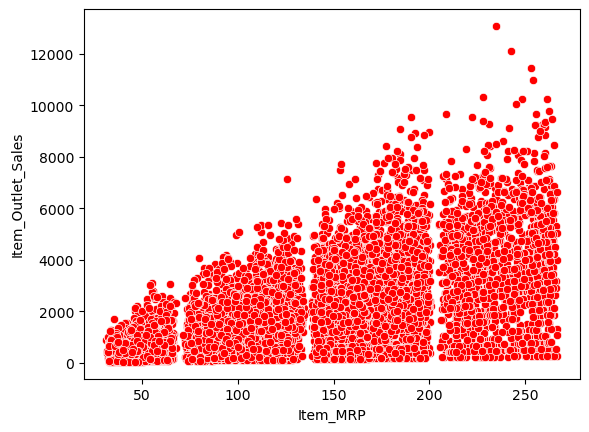

In [44]:
sns.scatterplot(data=combined,x='Item_MRP',y='Item_Outlet_Sales',color = 'red')
plt.show()

conclusion : since we know that the MRP is combined and thus 
    we see a combined effect with sales 
    we understand that the MRP is multimodal data which leads to multiple
    transactions combined together 
    hence we can conclude that there is combination effect on MRP
    vs sales

In [45]:
combined.loc[combined.Item_Identifier=='FDP10','Item_Weight']
#all items with same item id. has same weight which means that their mean=median=mode 
#hence we can impute the null values with any of the three 

7         NaN
585      19.0
2623     19.0
3382     19.0
4585     19.0
6087     19.0
7883     19.0
11896    19.0
12371    19.0
13327     NaN
Name: Item_Weight, dtype: float64

In [46]:
#Impute the missing values 
combined["Item_Weight"] = combined.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

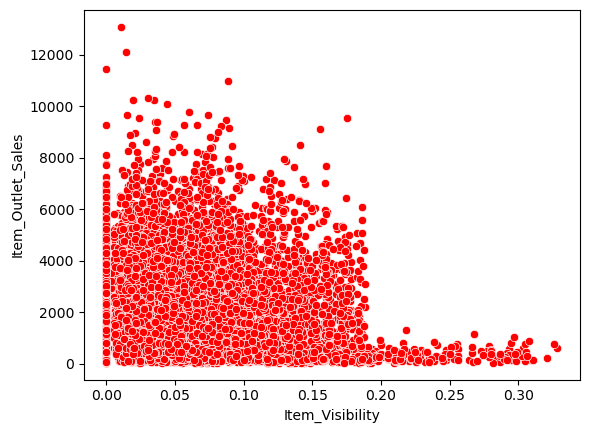

In [47]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=combined,color='red')
plt.show()

In [48]:
# Impute the Missing Values
combined["Item_Visibility"] = combined.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(to_replace = 0,value = x.mean()))

In [49]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [50]:
combined.loc[combined.Outlet_Size.isnull()].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986


In [51]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [52]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [53]:
combined.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Size
OUT013             Supermarket Type1  High           1553
OUT018             Supermarket Type2  Medium         1546
OUT019             Grocery Store      Small           880
OUT027             Supermarket Type3  Medium         1559
OUT035             Supermarket Type1  Small          1550
OUT046             Supermarket Type1  Small          1550
OUT049             Supermarket Type1  Medium         1550
Name: count, dtype: int64

In [54]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Size']='Small'

In [55]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Outlet_Sales    5681
dtype: int64

## Feature Engineering

In [56]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [61]:
ids = []
for i in combined.Item_Identifier:
    ids.append(i[:2])

In [62]:
combined['Item_IDS'] = pd.Series(ids)

In [63]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

### Creating 'Perishable' & 'Non-Perishable' in Item_type

In [64]:
perish = ['Dairy','Meat', 'Fruits and Vegetables',
         'Breakfast''Breads', 'Starchy Foods','Seafood']

In [65]:
def per(x):
    if x in perish:
        return("Perishables")
    else:
        return("Non_Perishables")

In [66]:
combined["Item_Type_Cat"] = combined.Item_Type.apply(per)

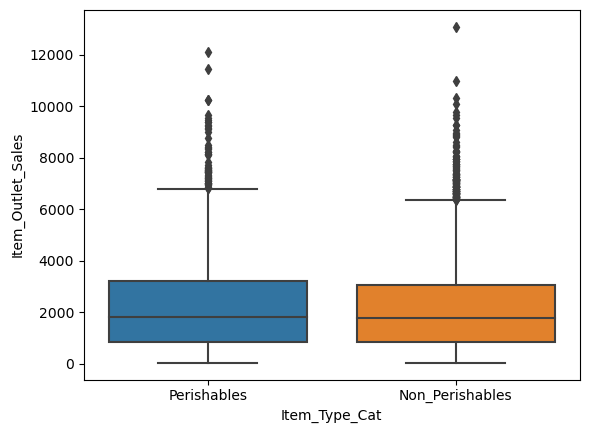

In [68]:
#patter between item type and sales
sns.boxplot(x='Item_Type_Cat',y='Item_Outlet_Sales',data=combined)
plt.show()

### inference : 
* Both Perishables and Non-Perishables exhibit similar central tendencies in sales, but Non-Perishables show slightly more variability and a few more high-value outliers.
* This suggests that while the average sales for both categories are comparable, the sales of Non-Perishables can be more inconsistent with a higher potential for very high sales in some cases.
* In conclusion, while there isn't a stark difference between the sales distributions of Perishables and Non-Perishables, Non-Perishables have slightly more variation and higher potential outlier sales.








In [69]:
combined.loc[combined.Item_IDS=='NC','Item_Fat_Content']='Non-Edible'

In [70]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Item_Type_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishables
4,NCD19,8.93,Non-Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishables


### Imputing 'OUT027' & 'OUT013' as top outlets as their sales are highest
### Imputing 'OUT010' & 'OUT019' as worst outlets as their sales are lowest
### Imputing rest outlets as good

In [71]:
#Outlets 
top = ['OUT027','OUT013']
worst = ['OUT010','OUT019']

def outlets(x):
    if x in top:
        return('Best')
    elif x in worst:
        return('Worst')
    else:
        return('Good')

In [72]:
combined['Outlets'] = combined.Outlet_Identifier.apply(outlets)

In [73]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Item_Type_Cat,Outlets
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,Good
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,Good


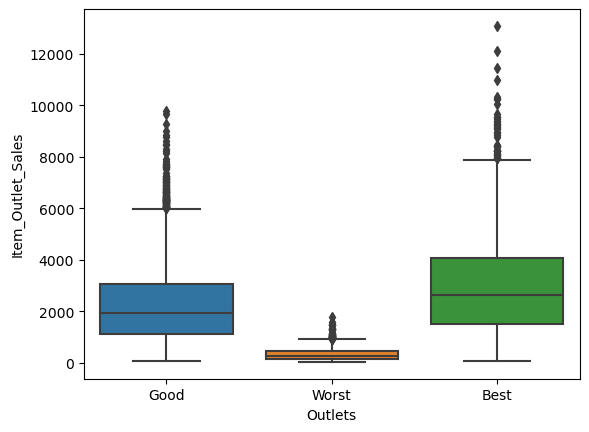

In [75]:
sns.boxplot(x='Outlets',y='Item_Outlet_Sales',data=combined)
plt.show()

## drop unnecessary columns :

In [76]:
# Drop the Unnecessary Columns now
combined.drop(["Item_Identifier", "Item_Type", "Outlet_Identifier",
              "Outlet_Establishment_Year"], axis =1, 
              inplace = True)

## Categorical encoding

In [79]:
#Label encoding on outlet_size , Outlet_Location_Type, and Outlets
mapped_size = {"Medium":3, "High":2, "Small":1}
mapped_outlet = {"Best":3, "Good":2, "Worst":1}
mapped_loc = {"Tier 3":3, "Tier 1":2, "Tier 2":1}

#combined.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].describe()

In [80]:
combined['Outlet_Size'] = combined['Outlet_Size'].map(mapped_size)

In [81]:
combined['Outlets'] = combined['Outlets'].map(mapped_outlet)

In [82]:
combined['Outlet_Location_Type'] = combined['Outlet_Location_Type'].map(mapped_loc)

In [83]:
# one hot encoding on rest data
dummy = pd.get_dummies(combined, drop_first = True)

### Splitting data into train and test

In [84]:
# Split the Data into Train and Test
newtrain = dummy.loc[0:train.shape[0]-1, ]
newtest = dummy.loc[train.shape[0]:, ]

In [85]:
# Drop the Target from the Test set
newtest.drop("Item_Outlet_Sales", axis = 1, inplace = True)

In [86]:
newtest.shape

(5681, 14)

## Model Building

In [87]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [88]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

X = newtrain.drop("Item_Outlet_Sales", axis =1)
y = newtrain.Item_Outlet_Sales

lr = LinearRegression()

predictions = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    validn_xtest = X.iloc[test_index]
    validn_ytest = y.iloc[test_index]
    # Model
    pred = lr.fit(xtrain, ytrain).predict(newtest)
    predictions.append(pred)

In [89]:
predictions

[array([1854.70704805, 1535.42495771, 1865.02422812, ..., 1953.65362077,
        3494.34385307, 1406.59045627]),
 array([1847.05782304, 1522.59149996, 1865.00356916, ..., 1920.03766824,
        3447.1027411 , 1379.32426221]),
 array([1830.01389477, 1527.31022956, 1886.46124757, ..., 1938.57315298,
        3516.72078548, 1370.14807736]),
 array([1854.13988334, 1518.43588679, 1859.22380781, ..., 1910.77187541,
        3466.88089758, 1364.77508482]),
 array([1825.82080736, 1553.25878257, 1825.47247339, ..., 1947.18220888,
        3509.30688307, 1409.45255904])]

In [90]:
pd.DataFrame(predictions).T

,0,1,2,3,4
0,1854.707048,1847.057823,1830.013895,1854.139883,1825.820807
1,1535.424958,1522.591500,1527.310230,1518.435887,1553.258783
2,1865.024228,1865.003569,1886.461248,1859.223808,1825.472473
3,2564.603672,2499.525521,2529.094035,2514.260438,2560.975629
4,5170.983927,5147.283003,5246.066398,5206.062446,5195.559246
...,...,...,...,...,...
5676,2329.782138,2307.289422,2305.982844,2316.621520,2312.656291
5677,2440.285657,2434.318512,2460.525835,2449.003125,2458.288828
5678,1953.653621,1920.037668,1938.573153,1910.771875,1947.182209
5679,3494.343853,3447.102741,3516.720785,3466.880898,3509.306883


In [91]:
finalpred = pd.DataFrame(predictions).T.mean(axis=1)

In [92]:
finalpred.shape

(5681,)

In [176]:
# Submission File

submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
             "Outlet_Identifier": test.Outlet_Identifier, 
             "Item_Outlet_Sales": np.abs(finalpred)})

In [177]:
#
submission.to_csv('LRMODEL_Bigmart.csv',index=False)

In [178]:
#Elastic net
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

X = newtrain.drop("Item_Outlet_Sales", axis =1)
y = newtrain.Item_Outlet_Sales
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

predictions = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    validn_test = X.iloc[test_index]
    validn_ytest = y.iloc[test_index]
    # Model
    pred = rf.fit(xtrain, ytrain).predict(newtest)
    predictions.append(pred)

In [179]:
finalpred = pd.DataFrame(predictions).T.mean(axis=1)

In [180]:
submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
             "Outlet_Identifier": test.Outlet_Identifier, 
             "Item_Outlet_Sales": np.abs(finalpred)})

In [181]:
submission.to_csv('RF_Bigmart.csv',index=False)